<a href="https://colab.research.google.com/github/eqmugge/MAT421/blob/main/MAT421_17.4_17.5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

17.4 Lagrange Interpolation using scipy

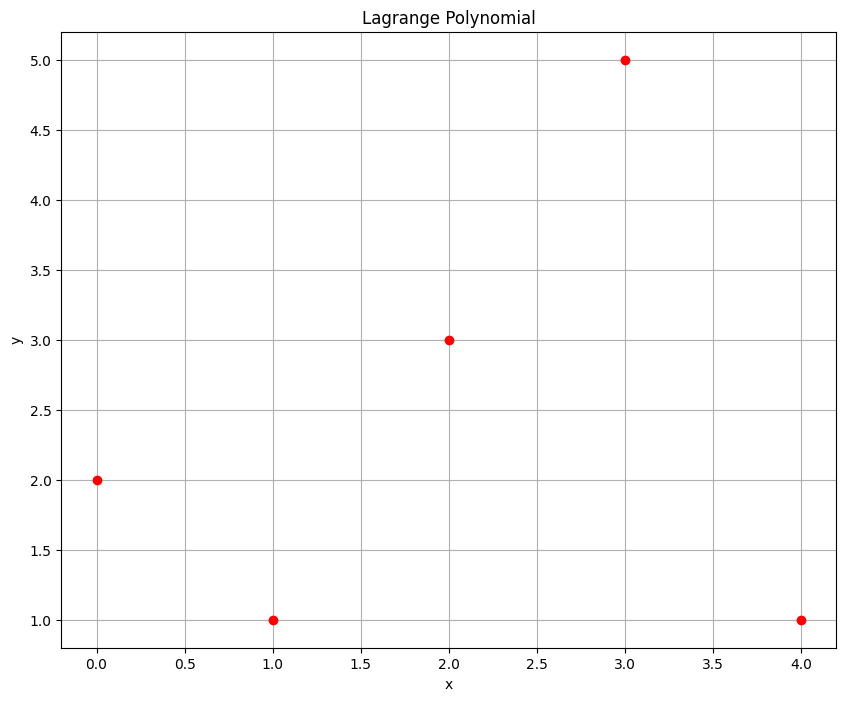

In [7]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

x = [0, 1, 2, 3, 4]
y = [2, 1, 3, 5, 1]

x_new=np.arange(0,4,101)
f = lagrange(x, y)


fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()


17.5 Newtons Polynomial Interpolation

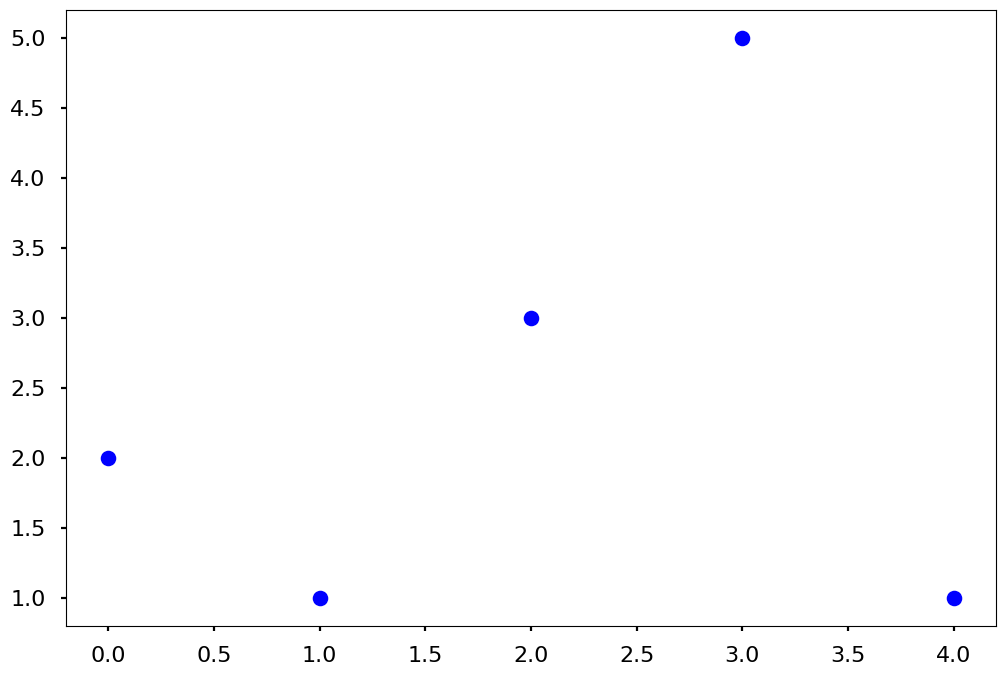

In [9]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def divided_diff(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:,0] = y

    for j in range(1,n):
        for i in range(n-j):
          coef[i][j] = \
          (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
    return coef

def newton_poly(coef, x_data, x):
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

x = np.array([0, 1, 2, 3, 4])
y = np.array([2, 1, 3, 5, 1])
a_s = divided_diff(x, y)[0, :]
x_new = np.arange(0,4,101)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)
